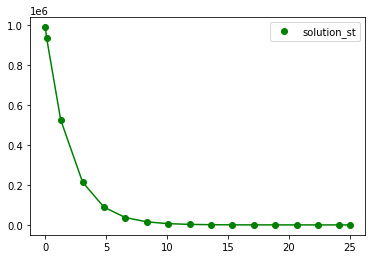

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import scipy


a = 0.5
b = 0.3
N = 1000000
t0, tf = 0, 25
s0 = 990000
i0 = 7000
r0 = 3000

def dsdt(t, s):
    return -a * s

solution_st = solve_ivp(dsdt, (t0, tf), [s0], dense_output = True)
t, y = solution_st.t, solution_st.y[0]
z, = solution_st.sol(t)
plt.plot(t, z, color = 'g')
plt.plot(t, y, 'o', color = 'g', label = 'solution_st')

plt.legend()


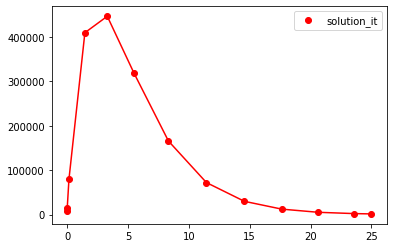

In [23]:
def didt(t, i):
    s = solution_st.sol(t)
    return a * s - b * i

solution_it = solve_ivp(didt, (t0, tf), [i0], dense_output = True)
t, y = solution_it.t, solution_it.y[0]
z, = solution_it.sol(t)
plt.plot(t, z, color = 'r')
plt.plot(t, y, 'o', color = 'r', label = 'solution_it')
plt.legend()

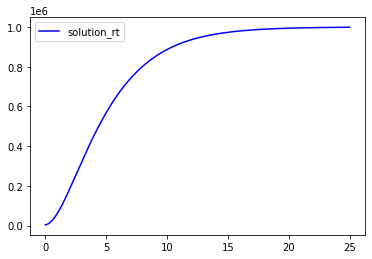

In [24]:
'''
def drdt(t, r):
    i = solution_it.sol(t)
    return b * i

solution_rt = solve_ivp(drdt, (t0, tf), [r0], dense_output = True)
t, y = solution_rt.t, solution_rt.y[0]
'''
solution_rt = []
total_t = np.linspace(t0, tf, 25)
for tt in total_t:
    res = N - solution_it.sol(tt) - solution_st.sol(tt)
    solution_rt.append(res[0])
f = interp1d(total_t, solution_rt, kind ='cubic')
more_t = np.linspace(0, 25, 10000)
plt.plot(more_t, f(more_t), color = 'b', label = 'solution_rt')
plt.legend()

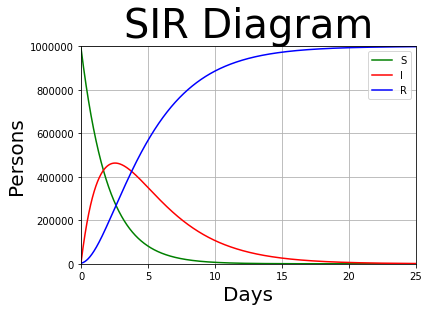

In [25]:
st = solution_st.sol(more_t)
it = solution_it.sol(more_t)

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.grid()
ax.set_xlim(0, 25)
ax.set_ylim(0, 1000000)
ax.set_title('SIR Diagram', fontsize = 40)
ax.set_xlabel('Days', fontsize = 20)
ax.set_ylabel('Persons', fontsize = 20)

ax.plot(more_t, st[0], color = 'g', label = 'S')
ax.plot(more_t, it[0], color = 'r', label = 'I')
ax.plot(more_t, f(more_t), color = 'b', label = 'R')
ax.legend()

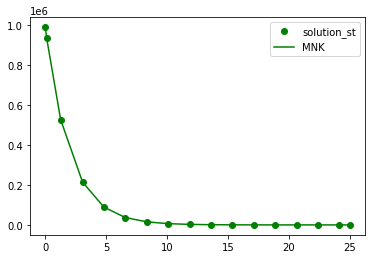

In [26]:
#HW 5.2

t1 = np.array(solution_st.t)
y1 = np.array(solution_st.sol(t1))

def s_exp(t, a, s0):
    return s0 * np.exp(-a * t)

def diff(p, y, t):
    a, s0 = p
    return y - s_exp(t, a, s0)

a0 = 1
s = s0
p2 = (a0, s)
aprx, _ = scipy.optimize.leastsq(diff, p2, args = (y1[0], t1))

st_p = aprx[1] * np.exp(-aprx[0] * t1)

plt.plot(t1, y1[0], 'o', color = 'g', label = 'solution_st')
plt.plot(t1, st_p, color = 'g', label='MNK')
plt.legend()

[3.43318872e-01 4.20074983e+04]


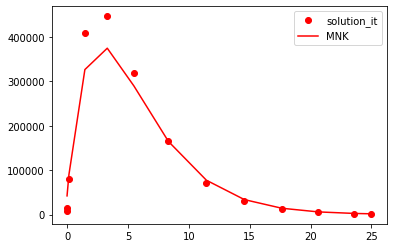

In [27]:
t2 = np.array(solution_it.t)
y2 = np.array(solution_it.sol(t2))
s0 = aprx[1]

def i_exp(t, al, i0):
    return (i0 + al * s0 * t) * np.exp(-al  * t)

def diff2(p, y, t):
    al, i0 = p
    return y - i_exp(t, al, i0)

al0 = 1
i = i0
p = (al0, i)
aprx2, _ = scipy.optimize.leastsq(diff2, p, args = (y2[0], t2))
print(aprx2)
it_p = (aprx2[1] + aprx2[0] * s0 * t2) * np.exp(-aprx2[0]  * t2)

plt.plot(t2, y2[0], 'o', color = 'r', label = 'solution_it')
plt.plot(t2, it_p, color = 'r', label='MNK')
plt.legend()

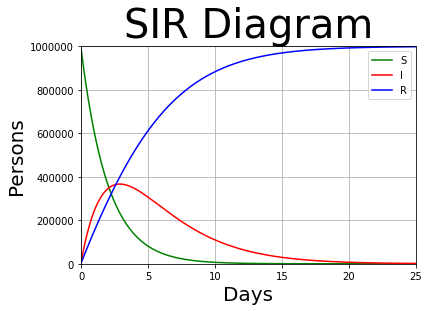

In [28]:
more_st = s0 * np.exp(-aprx[0] * more_t)
more_it = (i0 + aprx2[0] * s0 * more_t) * np.exp(-aprx2[0]  * more_t)
more_rt = []
for tt in more_t:
    more_rt.append(N - s0 * np.exp(-aprx[0] * tt) - (i0 + aprx2[0] * s0 * tt) * np.exp(-aprx2[0]  * tt))

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.grid()
ax.set_xlim(0, 25)
ax.set_ylim(0, 1000000)
ax.set_title('SIR Diagram', fontsize = 40)
ax.set_xlabel('Days', fontsize = 20)
ax.set_ylabel('Persons', fontsize = 20)

ax.plot(more_t, more_st, color = 'g', label = 'S')
ax.plot(more_t, more_it, color = 'r', label = 'I')
ax.plot(more_t, more_rt, color = 'b', label = 'R')
ax.legend()

In [29]:
al = aprx2[0]
i0 = aprx2[1]
t_max = scipy.optimize.minimize_scalar(lambda more_t, al, i0: - i_exp(more_t, al, i0), bracket = (0, 2, 5), args = (al, i0))

print(t_max)

     fun: -379979.0420827142
    nfev: 15
     nit: 11
 success: True
       x: 2.789148360083787
